In [3]:
import pandas as pd

dataset_movielen_url = "/home/quang/Two-stages-recommendation-system/datasets/ml-25m/"

# Load datasets
movies = pd.read_csv(dataset_movielen_url + "movies.csv")
ratings = pd.read_csv(dataset_movielen_url + "ratings.csv")
tags = pd.read_csv(dataset_movielen_url + "tags.csv")
links = pd.read_csv(dataset_movielen_url + "links.csv")

# Display the first few rows
print(movies.head())
print(ratings.head())
print(tags.head())
print(links.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating   timestamp
0       1      296     5.0  1147880044
1       1      306     3.5  1147868817
2       1      307     5.0  1147868828
3       1      665     5.0  1147878820
4       1      899     3.5  1147868510
   userId  movieId               tag   timestamp
0       3      260           classic  1439472355
1       3      260            sci-fi  1439472256
2       4     1732      

In [4]:
print(f"Movies: {movies.shape}")
print(f"Ratings: {ratings.shape}")
print(f"Tags: {tags.shape}")
print(f"Links: {links.shape}")


Movies: (62423, 3)
Ratings: (25000095, 4)
Tags: (1093360, 4)
Links: (62423, 3)


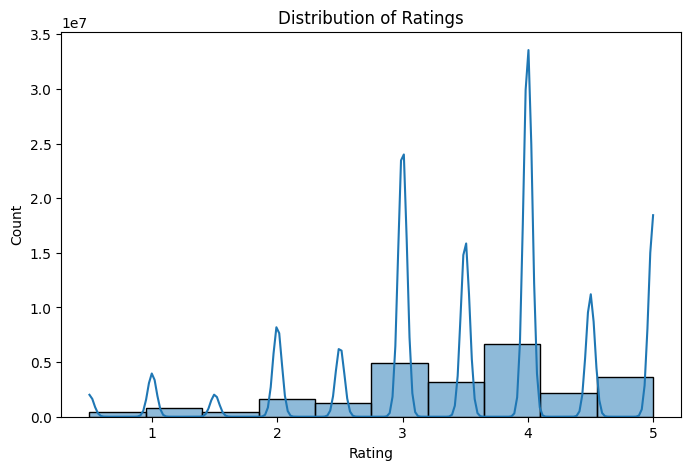

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(ratings["rating"], bins=10, kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()



In [8]:
ratings_df = ratings.drop('timestamp', axis=1)
ratings_df = pd.merge(ratings_df, movies, how='left', left_on='movieId', right_on='movieId')
ratings_df = ratings_df.drop('title', axis=1)
ratings_df['rating'] = (ratings_df['rating'] - 0.5)/4.5
ratings_df.head()

,userId,movieId,rating,genres
0,1,296,1.000000,Comedy|Crime|Drama|Thriller
1,1,306,0.666667,Drama
2,1,307,1.000000,Drama
3,1,665,1.000000,Comedy|Drama|War
4,1,899,0.666667,Comedy|Musical|Romance


In [ ]:
from scipy.sparse import csr_matrix

# Create a user-item interaction matrix
user_item_matrix = ratings.pivot(index='user_id', columns='movie_id', values='rating').fillna(0)

# Convert to a sparse matrix for efficiency
user_item_matrix_sparse = csr_matrix(user_item_matrix.values)

# Display the shape of the interaction matrix
print("User-Item Interaction Matrix Shape:", user_item_matrix_sparse.shape)

User-Item Interaction Matrix Shape: (943, 1152)


In [ ]:
# Create mappings for user and movie IDs
user_id_to_index = {user_id: idx for idx, user_id in enumerate(user_item_matrix.index)}
movie_id_to_index = {movie_id: idx for idx, movie_id in enumerate(user_item_matrix.columns)}

# Display sample mappings
print("User ID to Index Mapping (Sample):", list(user_id_to_index.items())[:5])
print("Movie ID to Index Mapping (Sample):", list(movie_id_to_index.items())[:5])

User ID to Index Mapping (Sample): [(1, 0), (2, 1), (3, 2), (4, 3), (5, 4)]
Movie ID to Index Mapping (Sample): [(1, 0), (2, 1), (3, 2), (4, 3), (5, 4)]


In [5]:
# Load the MovieLens dataset
def load_movielens_data(data_path):
    """
    Load the MovieLens dataset from the specified path.
    """
    ratings = pd.read_csv(os.path.join(data_path, 'u.data'), sep='\t', names=['user_id', 'movie_id', 'rating', 'timestamp'])
    movies = pd.read_csv(os.path.join(data_path, 'u.item'), sep='|', encoding='latin-1', 
                         names=['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url', 
                                'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 
                                'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 
                                'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])
    users = pd.read_csv(os.path.join(data_path, 'u.user'), sep='|', names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])
    return ratings, movies, users

# Preprocess the data
def preprocess_data(ratings):
    """
    Preprocess the ratings data to create a user-item interaction matrix.
    """
    # Create a user-item interaction matrix
    user_item_matrix = ratings.pivot(index='user_id', columns='movie_id', values='rating').fillna(0)
    user_item_matrix_sparse = csr_matrix(user_item_matrix.values)
    return user_item_matrix_sparse


In [ ]:
import sys
import os

# Add the 'src' directory to the Python path
current_dir = os.getcwd()  # Use the current working directory
src_dir = os.path.abspath(os.path.join(current_dir, '..', 'src'))
sys.path.append(src_dir)

# Import the KNN classes
from recommenders.knn.item_knn import ItemKNN
from recommenders.knn.user_knn import UserKNN
# print(sys.path)  
# Initialize and fit the UserKNN mode
data_path = 'ml-100k

ratings, movies, users = load_movielens_data(data_path)
user_item_matrix_sparse = preprocess_data(ratings)

user_knn = UserKNN(k=5, similarity_metric='cosine')
user_knn.fit(user_item_matrix_sparse)

# Generate recommendations for user 1
user_recommendations = user_knn.recommend(user_id=1, top_n=5)
print("UserKNN Recommendations for User 1:", user_recommendations)

# Initialize and fit the ItemKNN model
item_knn = ItemKNN(k=5, similarity_metric='cosine')
item_knn.fit(user_item_matrix_sparse)

# Generate recommendations for user 1
item_recommendations = item_knn.recommend(user_id=1, top_n=5)
print("ItemKNN Recommendations for User 1:", item_recommendations)

# src/recommenders/similarity/compute_similarity.py

NameError: name 'user_item_matrix_sparse' is not defined

In [2]:
# Map recommended movie IDs to titles
def get_movie_titles(movie_ids, movie_id_to_index, movies):
    index_to_movie_id = {idx: movie_id for movie_id, idx in movie_id_to_index.items()}
    recommended_movie_ids = [index_to_movie_id[idx] for idx in movie_ids]
    return movies[movies['movie_id'].isin(recommended_movie_ids)]['title']

# Get movie titles for UserKNN recommendations
user_recommended_titles = get_movie_titles(user_recommendations, movie_id_to_index, movies)
print("UserKNN Recommended Movies for User 1:")
print(user_recommended_titles)

# Get movie titles for ItemKNN recommendations
item_recommended_titles = get_movie_titles(item_recommendations, movie_id_to_index, movies)
print("ItemKNN Recommended Movies for User 1:")
print(item_recommended_titles)

NameError: name 'user_recommendations' is not defined